In [ ]:
%load_ext tensorboard
%tensorboard --logdir "results1\\"

In [1]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


In [2]:
from IPython import display
! pip install ultralytics
display.clear_output()

In [3]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
%matplotlib inline
import matplotlib.image as mpimg

In [4]:
train_images=r"F:\Sohail_data\yolo-training\train\Images"
train_labels= r"F:\Sohail_data\yolo-training\train\labels"
image_files = os.listdir(train_images)
labels_files = os.listdir(train_labels)
print(len(image_files))
print(len(labels_files))

16310
16310


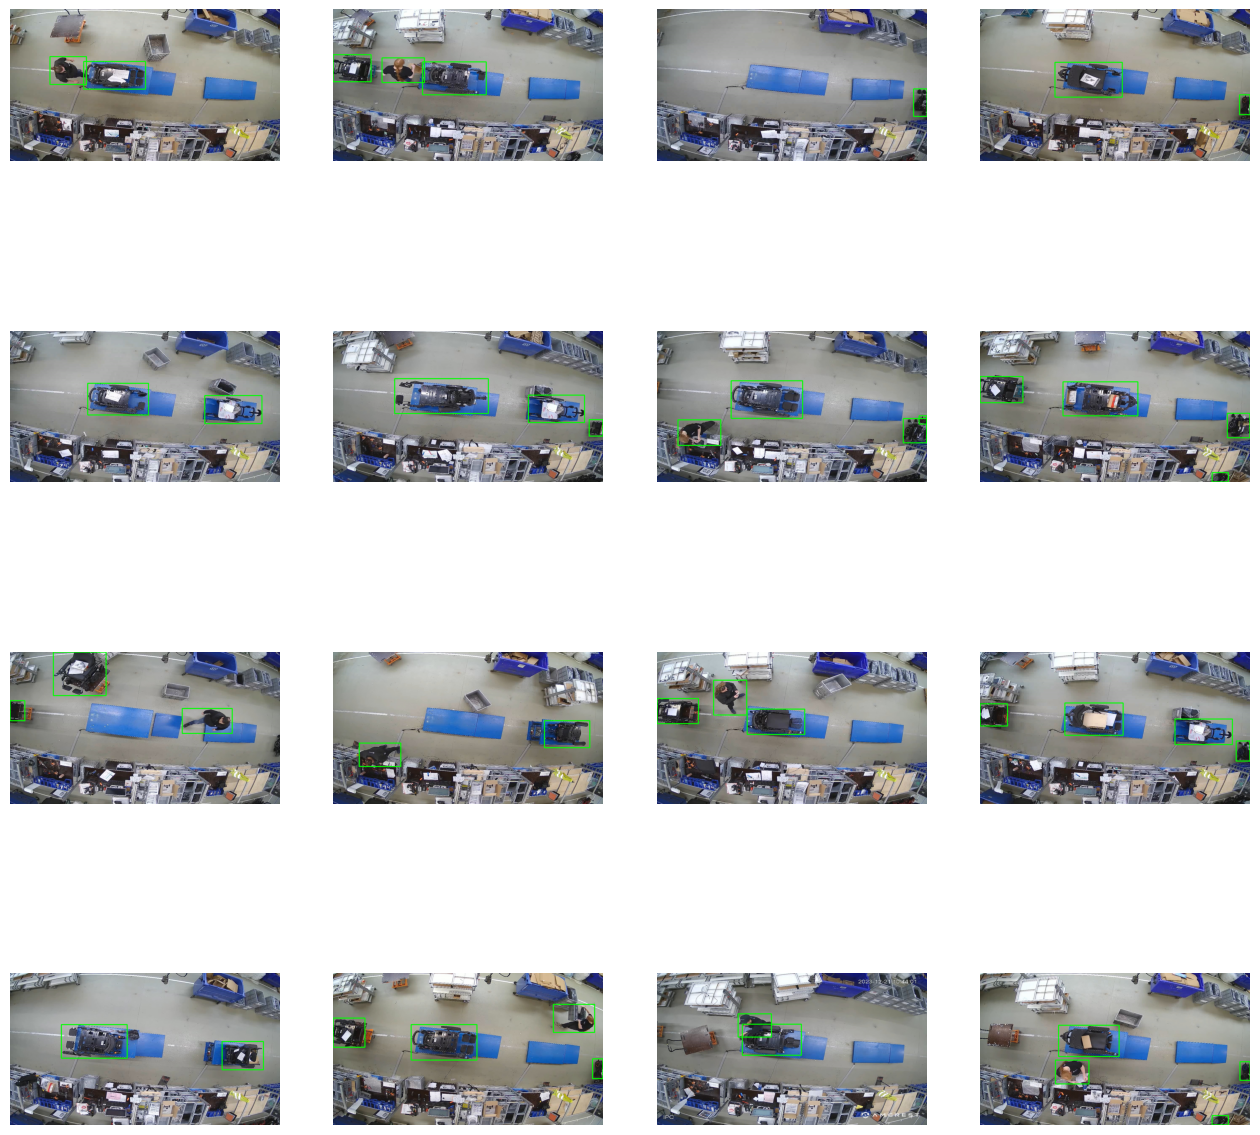

In [5]:
random_images = random.sample(image_files, 16)
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [6]:
print(train_images)
print(len(image_files))

F:\Sohail_data\yolo-training\train\Images
16310


In [7]:
image =cv2.imread(os.path.join(train_images, image_files[0]))
# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 1280x720 and 3 channels.


In [8]:
model = YOLO('yolov8n.pt').to(device)
# Train the model
results = model.train(data='data.yaml', epochs=30, batch=32, imgsz=640,project="D:\Sohail_data\ALL/results/camera13", name="experiment-13")

WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=D:\Sohail_data\ALL/results/camera13, name=experiment-13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

train: Scanning F:\Sohail_data\yolo-training\train\labels... 16310 images, 0 backgrounds, 6 corrupt: 100%|██████████| 16310/16310 [04:14<00:00, 64.07it/s]

train: WARNING ⚠️ F:\Sohail_data\yolo-training\train\images\c13-161902-1-20240109.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0109]
train: WARNING ⚠️ F:\Sohail_data\yolo-training\train\images\c13-162002-2-20240109.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0106]
train: WARNING ⚠️ F:\Sohail_data\yolo-training\train\images\c13-162102-0-20240109.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0129]
train: WARNING ⚠️ F:\Sohail_data\yolo-training\train\images\c13-162102-1-20240109.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0106]
train: WARNING ⚠️ F:\Sohail_data\yolo-training\train\images\c13-162102-2-20240109.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0102]
train: WARNING ⚠️ F:\Sohail_data\yolo-training\train\images\c13-162202-0-20240109.jpg: ignoring corrupt image/label: non-norm

train: New cache created: F:\Sohail_data\yolo-training\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning F:\Sohail_data\yolo-training\val\labels... 2038 images, 0 backgrounds, 2 corrupt: 100%|██████████| 2038/2038 [00:32<00:00, 63.48it/s]

val: WARNING ⚠️ F:\Sohail_data\yolo-training\val\images\c13-161902-2-20240109.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0102]
val: WARNING ⚠️ F:\Sohail_data\yolo-training\val\images\c13-162002-1-20240109.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0117]
val: New cache created: F:\Sohail_data\yolo-training\val\labels.cache


Plotting labels to D:\Sohail_data\ALL\results\camera13\experiment-13\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to D:\Sohail_data\ALL\results\camera13\experiment-13
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       4.5G     0.8294     0.9145      0.953         83        640: 100%|██████████| 510/510 [02:34<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.02it/s]


                   all       2036       6356      0.978      0.956      0.985      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30       4.5G     0.7106     0.4637     0.9219        101        640: 100%|██████████| 510/510 [01:39<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  5.25it/s]

                   all       2036       6356      0.982      0.962      0.987      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.48G     0.6764     0.4101     0.9126        116        640: 100%|██████████| 510/510 [02:14<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.83it/s]

                   all       2036       6356      0.979      0.961      0.989      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       4.5G     0.6573       0.39     0.9091         75        640: 100%|██████████| 510/510 [03:14<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.58it/s]

                   all       2036       6356      0.981       0.97       0.99      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.49G     0.6253     0.3654     0.8994        103        640: 100%|██████████| 510/510 [03:13<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.57it/s]

                   all       2036       6356      0.988      0.978      0.991      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.49G     0.5987     0.3463     0.8906         93        640: 100%|██████████| 510/510 [03:08<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.36it/s]

                   all       2036       6356      0.978       0.97       0.99      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.49G     0.5796     0.3329      0.887        103        640: 100%|██████████| 510/510 [02:56<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.27it/s]

                   all       2036       6356      0.984      0.977      0.991      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30       4.5G     0.5679     0.3244     0.8837         89        640: 100%|██████████| 510/510 [01:37<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.36it/s]

                   all       2036       6356      0.986      0.974      0.991      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.49G     0.5521     0.3134     0.8778         95        640: 100%|██████████| 510/510 [01:37<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.46it/s]

                   all       2036       6356      0.989       0.98      0.993      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30       4.5G     0.5335     0.3038     0.8741         89        640: 100%|██████████| 510/510 [01:38<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]

                   all       2036       6356      0.982      0.983      0.992      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      4.49G     0.5238     0.2975     0.8721         83        640: 100%|██████████| 510/510 [02:18<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.14it/s]

                   all       2036       6356      0.996      0.979      0.993        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.49G     0.5165     0.2904     0.8687        133        640: 100%|██████████| 510/510 [01:35<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.54it/s]

                   all       2036       6356      0.991      0.984      0.994      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30       4.5G      0.502     0.2843     0.8673         92        640: 100%|██████████| 510/510 [01:35<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.54it/s]

                   all       2036       6356      0.991      0.986      0.994      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30       4.5G     0.4947     0.2779     0.8652         91        640: 100%|██████████| 510/510 [01:38<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.25it/s]

                   all       2036       6356      0.992      0.987      0.994      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      4.48G     0.4848      0.273      0.862         85        640: 100%|██████████| 510/510 [01:36<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.60it/s]

                   all       2036       6356      0.992      0.987      0.994      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.49G     0.4747     0.2672     0.8594         70        640: 100%|██████████| 510/510 [01:34<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.42it/s]

                   all       2036       6356      0.992      0.985      0.994      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.49G     0.4691     0.2628     0.8588        102        640: 100%|██████████| 510/510 [01:34<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.58it/s]

                   all       2036       6356      0.993      0.987      0.994      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30       4.5G     0.4647     0.2595     0.8577        104        640: 100%|██████████| 510/510 [01:34<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.60it/s]

                   all       2036       6356       0.99       0.99      0.995      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       4.5G     0.4552     0.2545     0.8552        101        640: 100%|██████████| 510/510 [01:34<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.57it/s]

                   all       2036       6356      0.992      0.986      0.994      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.49G     0.4492     0.2502     0.8519         93        640: 100%|██████████| 510/510 [01:37<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.37it/s]

                   all       2036       6356      0.991       0.99      0.995      0.918


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.44G     0.4265      0.235     0.8394         39        640: 100%|██████████| 510/510 [01:37<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.22it/s]

                   all       2036       6356      0.994      0.987      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      4.44G     0.4153     0.2291     0.8381         31        640: 100%|██████████| 510/510 [01:36<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.32it/s]

                   all       2036       6356      0.992      0.988      0.995      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.44G     0.4038     0.2221     0.8343         39        640: 100%|██████████| 510/510 [01:36<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.09it/s]

                   all       2036       6356      0.993      0.987      0.995      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      4.44G     0.3936     0.2146     0.8308         34        640: 100%|██████████| 510/510 [01:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.21it/s]

                   all       2036       6356      0.993      0.988      0.995      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.44G     0.3853     0.2099     0.8289         62        640: 100%|██████████| 510/510 [01:33<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.50it/s]

                   all       2036       6356      0.992      0.991      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.44G     0.3751     0.2039     0.8262         43        640: 100%|██████████| 510/510 [01:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.36it/s]

                   all       2036       6356      0.998      0.987      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      4.44G     0.3691     0.2002      0.824         50        640: 100%|██████████| 510/510 [01:33<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.33it/s]

                   all       2036       6356      0.996      0.987      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.44G     0.3609     0.1952     0.8219         37        640: 100%|██████████| 510/510 [01:33<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]

                   all       2036       6356      0.992       0.99      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.44G      0.354     0.1907     0.8202         46        640: 100%|██████████| 510/510 [01:37<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.29it/s]

                   all       2036       6356      0.994      0.989      0.995      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      4.44G     0.3476     0.1871     0.8186         39        640: 100%|██████████| 510/510 [01:35<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.23it/s]

                   all       2036       6356      0.993      0.991      0.995      0.926



30 epochs completed in 1.000 hours.
Optimizer stripped from D:\Sohail_data\ALL\results\camera13\experiment-13\weights\last.pt, 6.2MB
Optimizer stripped from D:\Sohail_data\ALL\results\camera13\experiment-13\weights\best.pt, 6.2MB

Validating D:\Sohail_data\ALL\results\camera13\experiment-13\weights\best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.9.18 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.84it/s]


                   all       2036       6356      0.993      0.991      0.995      0.926
                Person       2036       1744      0.989      0.986      0.995      0.876
                 Chair       2036       4612      0.997      0.997      0.995      0.977
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to D:\Sohail_data\ALL\results\camera13\experiment-13


In [10]:
model = YOLO(r'D:\Sohail_data\ALL/results/camera13/experiment-13\weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(data="data.yaml", conf = 0.25,project="D:\Sohail_data\ALL/results\camera13\experiment-13/val", split="test")

Ultralytics YOLOv8.1.29 🚀 Python-3.9.18 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning F:\Sohail_data\yolo-training\test\labels... 2040 images, 0 backgrounds, 1 corrupt: 100%|██████████| 2040/2040 [00:31<00:00, 65.02it/s]

val: WARNING ⚠️ F:\Sohail_data\yolo-training\test\images\c13-162002-0-20240109.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0094]
val: New cache created: F:\Sohail_data\yolo-training\test\labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 128/128 [00:14<00:00,  9.03it/s]


                   all       2039       6414      0.994      0.988      0.994      0.929
                Person       2039       1738      0.991      0.978      0.993      0.877
                 Chair       2039       4676      0.997      0.998      0.995      0.981
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to D:\Sohail_data\ALL\results\camera13\experiment-13\val\val


In [ ]:
import seaborn as sns

sns.set_style('darkgrid')
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread(r'D:\Sohail_data\ALL\results\experiment-14\val\val/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

In [ ]:
# Function to perform ship detections
def detect(img_path):

    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)
    # print(f"detected_result",detect_result.shape)

    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img

In [ ]:
import random

# Define the directory where the custom images are stored
custom_image_dir = r'D:\Sohail_data\ALL\val\images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

**Some extra work**


In [ ]:
i=200
import cv2

# Read an image using OpenCV
img = cv2.imread(os.path.join(image_path, image_files[i]))
model = YOLO('/content/drive/MyDrive/results/experiment-1/weights/best.pt')
res=model.predict(img, save=True,project="/content/drive/MyDrive/results",show=True)
res[0].show()

In [ ]:
Image(filename='runs/detect/predict/dog.jpeg', height=600)